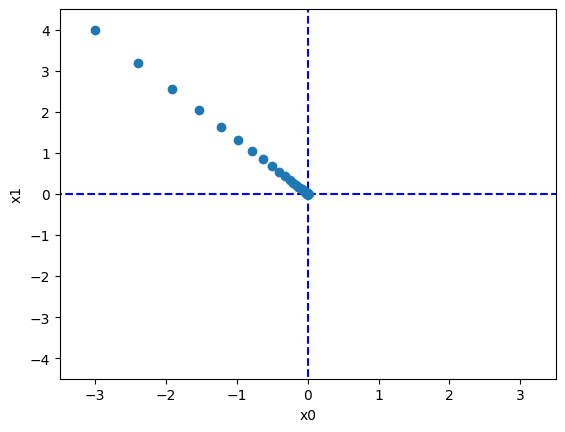

In [10]:
# coding: utf-8
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 2차원을 고려한 수치미분 원소 함수
# 편미분하는 함수
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성


    # 각변수의 개수만큼 편미분을 구함
    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) /(2*h)
        x[idx] = tmp_val # 값 복원

    return grad


# 기울기를 계산하는 함수
def numerical_gradient(f, X):

    # 변수가 하나일때 수치미분
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)

    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            # 변수가 두개 이상일때 수치 미분, 각 행마다 미분
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


# 수치미분으로 구한 기울기를 이용해 중심으로 이동
# 경사 하강법
# lr, step_num은 디폴트 값
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr*grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()
